In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [266]:
df = pd.read_csv('intrestrates.csv')
print(df.columns)
print(df.head())

Index(['Country Code', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
  Country Code       1980      1981      1982      1983      1984      1985  \
0          IND  10.774631 -1.061146  4.476508  5.118237  7.774707  7.320987   
1          USA   1.889903  4.034548  5.716390  8.594620  8.177347  6.618160   

       1986      1987      1988  ...      2014      2015      2016      2017  \
0  7.947100  8.681674  9.093224  ...  2.473522  3.865993  6.695176  7.556488   
1  8.141088  6.563327  6.193860  ...  1.354075  1.473254  1.354776  2.237075   

       2018      2019      2020      2021      2022      2023  
0  6.232711  5.327609  5

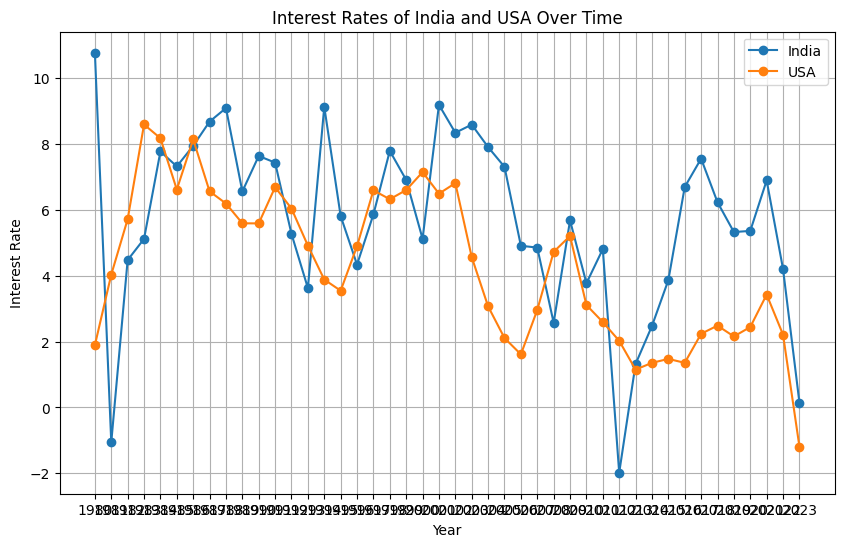

Country Code,IND,USA
1980,10.774631,1.889903
1981,-1.061146,4.034548
1982,4.476508,5.716390
1983,5.118237,8.594620
1984,7.774707,8.177347


In [267]:
df = df.set_index('Country Code').transpose()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['IND'], label='India', marker='o')
plt.plot(df.index, df['USA'], label='USA', marker='o')
plt.title('Interest Rates of India and USA Over Time')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()
df.head()

In [268]:
df['diff'] = df['USA'] - df['IND']

In [269]:
df2=pd.read_csv('Foreign_Exchange_Rates.csv')
df2.head()

,Time Series,INDIA - INDIAN RUPEE/US$
0,03-01-2000,43.55
1,04-01-2000,43.55
2,05-01-2000,43.55
3,06-01-2000,43.55
4,07-01-2000,43.55


In [270]:
df2['Time Series'] = pd.to_datetime(df2['Time Series'], format='%d-%m-%Y')
df2['Year'] = df2['Time Series'].dt.year
df2['INDIA - INDIAN RUPEE/US$'] = pd.to_numeric(df2['INDIA - INDIAN RUPEE/US$'], errors='coerce')
df3 = df2.groupby('Year')['INDIA - INDIAN RUPEE/US$'].mean().reset_index()
print(df3)

    Year  INDIA - INDIAN RUPEE/US$
0   2000                 44.997476
1   2001                 47.219960
2   2002                 48.625697
3   2003                 46.590797
4   2004                 45.260988
5   2005                 44.000199
6   2006                 45.186056
7   2007                 41.177402
8   2008                 43.385913
9   2009                 48.332381
10  2010                 45.650743
11  2011                 46.578167
12  2012                 53.374343
13  2013                 58.514861
14  2014                 60.995252
15  2015                 64.107251
16  2016                 67.157171
17  2017                 65.065944
18  2018                 68.373438
19  2019                 70.377711


In [271]:
df.replace('ND', pd.NA, inplace=True)
df.dropna(inplace=True)
df2.replace('ND', pd.NA, inplace=True)
df2.dropna(inplace=True)

In [272]:
df.index.name = 'Country Code' 
df.reset_index(inplace=True)
print(df.columns)

Index(['Country Code', 'IND', 'USA', 'diff'], dtype='object', name='Country Code')


In [273]:
df = df.rename(columns={'Country Code': 'Year'}, inplace=True)